In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import linregress
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from pysolar.solar import *
import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Importando o arquivo dat para o pandas e definindo seus tipos
df = pd.read_csv('table1modified.csv', index_col=0)
df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric)
display(df)

# Dados de localização
latitude = 37.7510
longitude = -97.8220

,TIMESTAMP,RECORD,PTemp_C,AirTC_Avg,AirTC_Max,AirTC_Min,AirTC_Std,RH_Max,RH_Min,Rain_mm_Tot,...,CMP21_Difuse_T_C_Max,Pyrh_Irrad_Avg,Pyrh_Irrad_Max,Pyrh_Irrad_Min,Pyrh_Irrad_Std,Pyrh_Temp_Avg,Pyrh_Temp_Max,DNI,Angle,Azimuth
1,2016-05-16 04:31:00-03:00,643470,19.49,21.81,21.89,21.76,0.037,79.44,78.35,0.0,...,21.28,232.0,242.5,220.7,6.554,28.99,29.03,65.3,-31.114769,17.520008
2,2016-05-16 04:32:00-03:00,643471,19.57,21.72,21.76,21.62,0.033,78.35,77.71,0.0,...,21.33,203.9,220.7,191.0,9.770,29.08,29.15,58.1,-31.054673,17.786563
3,2016-05-16 04:33:00-03:00,643472,19.65,21.59,21.66,21.52,0.038,77.71,77.40,0.0,...,21.37,187.1,190.2,185.6,1.156,29.17,29.19,54.2,-30.993704,18.052678
4,2016-05-16 04:34:00-03:00,643473,19.73,21.48,21.55,21.42,0.032,77.95,77.44,0.0,...,21.46,198.6,205.8,187.1,5.413,29.24,29.28,58.2,-30.931862,18.318348
5,2016-05-16 04:35:00-03:00,643474,19.81,21.46,21.52,21.38,0.029,78.42,77.88,0.0,...,21.47,206.0,217.5,194.9,8.210,29.32,29.36,61.1,-30.869151,18.583567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305184,2017-04-19 05:02:00-03:00,1130224,24.78,23.26,23.32,23.22,0.023,73.32,72.03,0.0,...,26.58,106.4,116.9,100.6,4.199,32.83,32.87,55.7,-36.478808,28.349362
305185,2017-04-19 05:03:00-03:00,1130225,24.81,23.12,23.25,23.05,0.042,72.78,71.72,0.0,...,26.58,191.6,381.2,118.5,79.250,32.85,32.91,95.9,-36.384286,28.630573
305186,2017-04-19 05:04:00-03:00,1130226,24.92,23.15,23.19,23.08,0.029,72.64,71.96,0.0,...,26.58,361.6,415.5,302.4,39.420,32.92,33.00,174.5,-36.288913,28.910997
305187,2017-04-19 05:05:00-03:00,1130227,25.07,23.15,23.22,23.08,0.032,72.57,71.69,0.0,...,26.58,423.3,457.6,384.3,23.940,32.99,33.04,204.6,-36.192696,29.190631


In [3]:
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])

In [4]:
df.columns
df.index = df['TIMESTAMP']

In [5]:
# dataframe para 1h

# Temperatura Média das últimas 12h:
df['T 12h mean'] = df['AirTC_Avg'].rolling(60*12).mean()

# Temperatura Média das últimas 6h:
df['T 6h mean'] = df['AirTC_Avg'].rolling(30*12).mean()


# chuva acumulada das últimas 12h:
df['Rain acc 12h'] = df['Rain_mm_Tot'].rolling(60*12).sum()

# chuva acumulada das últimas 6h:
df['Rain acc 6h'] = df['Rain_mm_Tot'].rolling(30*12).sum()

# Soma de toda a DNI das últimas 12h (Em kJ/m²)
df['Target'] = df['DNI'].rolling(60*12).sum()*60/1000

# Média de Pressão das últimas 12h:
df['kPa_Avg 12h'] = df['BP_kPa_Avg'].rolling(60*12).mean()

# Média de Pressão das últimas 6h:
df['kPa_Avg 6h'] = df['BP_kPa_Avg'].rolling(30*12).mean()


df = df.dropna()
display(df.tail())

,TIMESTAMP,RECORD,PTemp_C,AirTC_Avg,AirTC_Max,AirTC_Min,AirTC_Std,RH_Max,RH_Min,Rain_mm_Tot,...,DNI,Angle,Azimuth,T 12h mean,T 6h mean,Rain acc 12h,Rain acc 6h,Target,kPa_Avg 12h,kPa_Avg 6h
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2017-04-19 05:02:00-03:00,2017-04-19 05:02:00-03:00,1130224,24.78,23.26,23.32,23.22,0.023,73.32,72.03,0.0,...,55.7,-36.478808,28.349362,21.219181,20.746056,6.217249e-14,4.440892e-14,477.89712,101.769861,101.757500
2017-04-19 05:03:00-03:00,2017-04-19 05:03:00-03:00,1130225,24.81,23.12,23.25,23.05,0.042,72.78,71.72,0.0,...,95.9,-36.384286,28.630573,21.220375,20.752611,6.217249e-14,4.440892e-14,483.65112,101.770000,101.758056
2017-04-19 05:04:00-03:00,2017-04-19 05:04:00-03:00,1130226,24.92,23.15,23.19,23.08,0.029,72.64,71.96,0.0,...,174.5,-36.288913,28.910997,21.221653,20.759250,6.217249e-14,4.440892e-14,494.12112,101.770139,101.758611
2017-04-19 05:05:00-03:00,2017-04-19 05:05:00-03:00,1130227,25.07,23.15,23.22,23.08,0.032,72.57,71.69,0.0,...,204.6,-36.192696,29.190631,21.222986,20.765944,6.217249e-14,4.440892e-14,506.39712,101.770278,101.759167
2017-04-19 05:06:00-03:00,2017-04-19 05:06:00-03:00,1130228,25.31,23.19,23.32,23.08,0.061,72.78,71.76,0.0,...,232.7,-36.095637,29.469474,21.224403,20.772778,6.217249e-14,4.440892e-14,520.35912,101.770417,101.759722


In [7]:
# Selecionando o Target
y = df.Target

# Selecionando as Features
features = ['T 12h mean', 'T 6h mean', 'Rain acc 12h', 'Rain acc 6h', 'kPa_Avg 12h', 'kPa_Avg 6h', 'Angle', 'Azimuth']
X = df[features]

# Separando o treino da validação do modelo
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

In [8]:
# Aplicação do modelo e cálculo da MAE
rf_model = RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=-1)
rf_model.fit(train_X, train_y)
predictions = rf_model.predict(val_X)
mae = mean_absolute_error(val_y, predictions)
print(f'MAE: {mae}')


MAE: 28.024108974528392


In [9]:
# Tabela de comparação estimado vs medida
tabela_comparativa = pd.DataFrame(val_y)
tabela_comparativa['Prediction'] = predictions
tabela_comparativa['Error'] = abs(tabela_comparativa['Prediction'] - tabela_comparativa['Target'])

tabela_comparativa = tabela_comparativa.sort_index()
display(tabela_comparativa)
tabela_comparativa.describe()

,Target,Prediction,Error
TIMESTAMP,,,
2016-05-16 16:44:00-03:00,9201.02220,9200.982300,0.039900
2016-05-16 16:54:00-03:00,9145.86420,9147.319920,1.455720
2016-05-16 16:58:00-03:00,9123.58020,9125.550240,1.970040
2016-05-16 16:59:00-03:00,9116.69220,9114.914280,1.777920
2016-05-16 17:02:00-03:00,9100.18620,9098.424120,1.762080
...,...,...,...
2017-04-19 04:49:00-03:00,418.71912,421.356434,2.637314
2017-04-19 04:50:00-03:00,420.53112,421.244713,0.713593
2017-04-19 04:55:00-03:00,430.88712,419.086849,11.800271


,Target,Prediction,Error
count,76118.000000,76118.000000,76118.000000
mean,5204.499095,5205.184423,28.024109
std,6137.485720,6128.907194,90.679838
min,-61.682820,-61.663662,0.000000
25%,155.721150,170.291563,0.140714
50%,2449.219200,2454.205102,4.128222
75%,9124.086015,9111.575238,22.523372
max,26988.076200,26987.903238,8792.452531


slope: 0.998484, intercept: 8.576986
R-squared: 0.999763
Mean Absolute Error (MAE): 28.024109 MJ/m²
Root Mean Squared Error (RMSE): 94.910883 MJ/m²
Relative Root Mean Squared Error (rRMSE): 1.823631
Features utilizadas: 
- T 12h mean
- T 6h mean
- Rain acc 12h
- Rain acc 6h
- kPa_Avg 12h
- kPa_Avg 6h
- Angle
- Azimuth


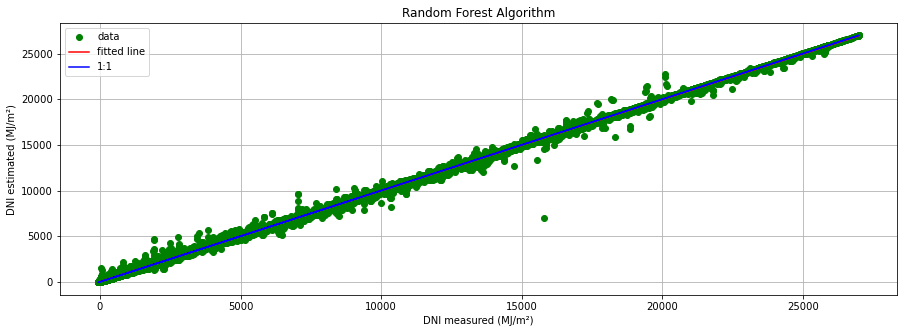

In [10]:
# Análise dos resultados
y= tabela_comparativa['Prediction']
x= tabela_comparativa['Target']

rmse = mean_squared_error(y, x)**(1/2)
media_medidas = float(tabela_comparativa['Target'].mean())

rrmse = (rmse*100)/(media_medidas)


# Regressão linear
slope, intercept, r_value, p_value, std_err = linregress(x, y)
print("slope: %f, intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)
print("Mean Absolute Error (MAE): %f MJ/m²" % mae)
print("Root Mean Squared Error (RMSE): %f MJ/m²" % rmse)
print("Relative Root Mean Squared Error (rRMSE): %f" % rrmse)
print("Features utilizadas: ")
for feature in features:
    print('- ' + feature)

plt.figure(figsize=(15, 5))
plt.plot(x, y, 'o', label='data', c='green')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.plot(x, x, 'b', label='1:1')
plt.title("Random Forest Algorithm")
plt.xlabel("DNI measured (MJ/m²)")
plt.ylabel("DNI estimated (MJ/m²)")
plt.legend()
plt.grid()
plt.show()

In [1]:
tabela_comparativa[0:10080].plot(y=['Target', 'Prediction'], figsize=[18,8])
df[0:10080].plot(y='DNI', figsize=[18,8])

NameError: name 'tabela_comparativa' is not defined

In [ ]:
# Teste com dados do IMACA7
df_test=pd.DataFrame()
